In [1]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import bct
from scipy.stats import kruskal

In [2]:
# load sample connectome
connectome_folder = 'data/connectomes/CN/'

file_pattern = os.path.join(connectome_folder, '*.csv')
connectome_files = glob.glob(file_pattern)

print("Connectome files found:", connectome_files)

# load each connectome and print shape
for file in connectome_files:
    try:
        connectome = np.loadtxt(file, delimiter=',')
        print(f"Loaded {os.path.basename(file)} with shape: {connectome.shape}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# load region names
region_df = pd.read_csv('data/TauRegionList.csv')
print("Number of regions:", region_df.shape[0])

Connectome files found: ['data/connectomes/CN/CN_41.csv', 'data/connectomes/CN/CN_40.csv', 'data/connectomes/CN/CN_18.csv', 'data/connectomes/CN/CN_24.csv', 'data/connectomes/CN/CN_30.csv', 'data/connectomes/CN/CN_31.csv', 'data/connectomes/CN/CN_25.csv', 'data/connectomes/CN/CN_19.csv', 'data/connectomes/CN/CN_33.csv', 'data/connectomes/CN/CN_27.csv', 'data/connectomes/CN/CN_26.csv', 'data/connectomes/CN/CN_32.csv', 'data/connectomes/CN/CN_36.csv', 'data/connectomes/CN/CN_22.csv', 'data/connectomes/CN/CN_23.csv', 'data/connectomes/CN/CN_37.csv', 'data/connectomes/CN/CN_21.csv', 'data/connectomes/CN/CN_35.csv', 'data/connectomes/CN/CN_9.csv', 'data/connectomes/CN/CN_8.csv', 'data/connectomes/CN/CN_34.csv', 'data/connectomes/CN/CN_20.csv', 'data/connectomes/CN/CN_5.csv', 'data/connectomes/CN/CN_39.csv', 'data/connectomes/CN/CN_11.csv', 'data/connectomes/CN/CN_10.csv', 'data/connectomes/CN/CN_38.csv', 'data/connectomes/CN/CN_4.csv', 'data/connectomes/CN/CN_6.csv', 'data/connectomes/CN/CN

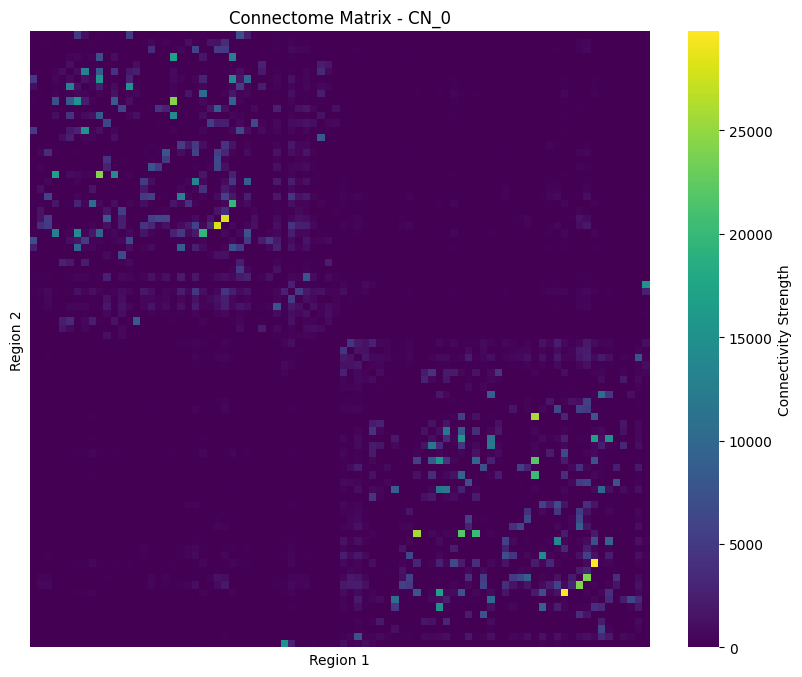

In [3]:
first_connectome = connectome_files[0]
connectome = np.loadtxt(first_connectome, delimiter=',')

for file in connectome_files:
    if os.path.basename(file) == 'CN_0.csv':
        CN_0 = np.loadtxt(file, delimiter=',')
        break

# visualize
plt.figure(figsize=(10, 8))
ax = sns.heatmap(CN_0, cmap='viridis', cbar_kws={'label': 'Connectivity Strength'}, xticklabels = False, yticklabels = False)
ax.set_title('Connectome Matrix - ' + os.path.basename('CN_0'))
ax.set_xlabel('Region 1')
ax.set_ylabel('Region 2')
plt.show()

In [4]:
# identify the top 5 individual connectivity values (their indices)

top_k = 5 

top5_flat_indices = np.argsort(CN_0.ravel())[-top_k:][::-1]  # descending order
strongest_connections = np.unravel_index(top5_flat_indices, CN_0.shape)
rows, cols = strongest_connections

# print the region names for each of the top 5 connectivity values
for rank in range(len(rows)):
    row_index = rows[rank]
    col_index = cols[rank]
    
    region1 = region_df.iloc[row_index]['Raj_labels'] if 'Raj_labels' in region_df.columns else region_df.iloc[row_index, 0]
    region2 = region_df.iloc[col_index]['Raj_labels'] if 'Raj_labels' in region_df.columns else region_df.iloc[col_index, 0]

    score = CN_0[row_index, col_index]
    
    print(f"Connection {rank+1}: {region1} <--> {region2} ({score:.4f})")


Connection 1: Superiorparietal_R <--> Precuneus_R (29776.0000)
Connection 2: Precuneus_R <--> Superiorparietal_R (29776.0000)
Connection 3: Superiorfrontal_L <--> Rostralmiddlefrontal_L (28101.0000)
Connection 4: Rostralmiddlefrontal_L <--> Superiorfrontal_L (28101.0000)
Connection 5: Cuneus_R <--> Pericalcarine_R (25775.0000)


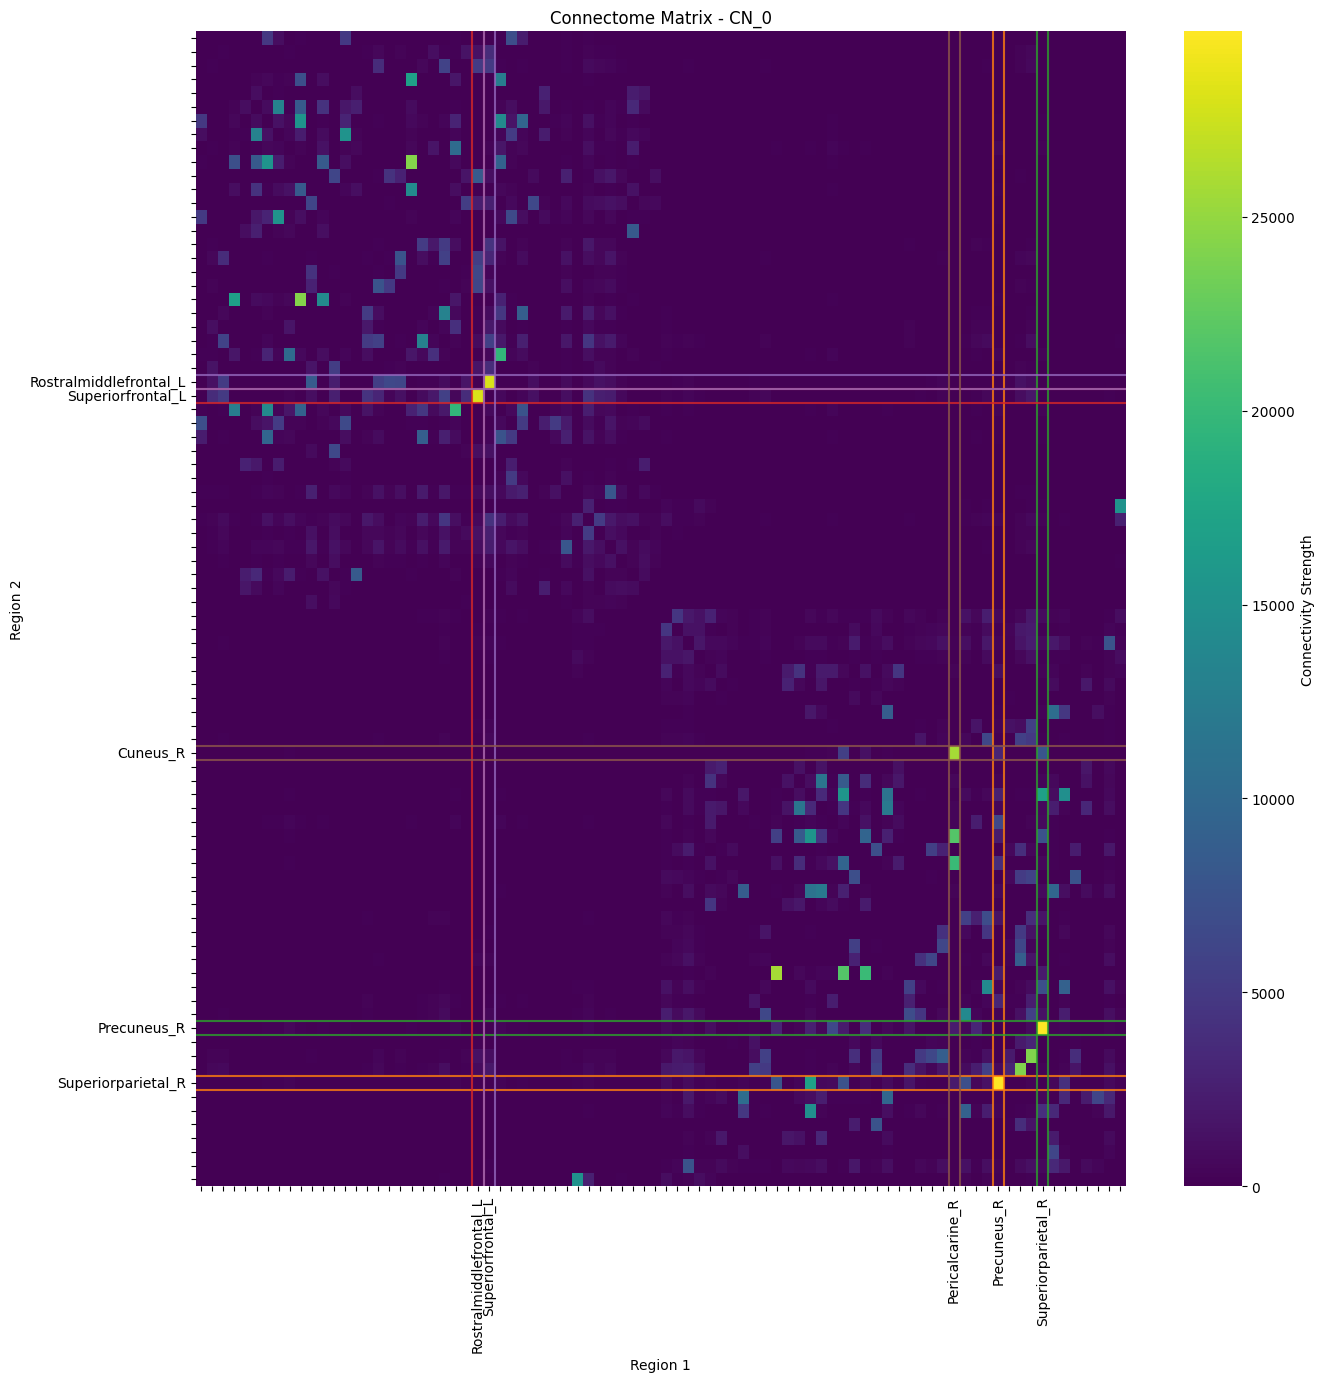

In [5]:
if 'Raj_labels' in region_df.columns:
    index_to_label = region_df['Raj_labels'].tolist()
else:
    index_to_label = region_df.iloc[:, 0].tolist()
    
top_k_list = [strongest_connections[0][i].item() for i in range(top_k)]
top_k_list

# visualize
plt.figure(figsize=(15, 15))
ax = sns.heatmap(CN_0, cmap='viridis', cbar_kws={'label': 'Connectivity Strength'})
# Square the column and rows where top_k connections are
for i in range(top_k):
    plt.axvline(x=strongest_connections[1][i], color=f"C{i+1}", alpha=0.8)
    plt.axvline(x=strongest_connections[1][i]+1, color=f"C{i+1}", alpha=0.8)
    plt.axhline(y=strongest_connections[0][i], color=f"C{i+1}", alpha=0.8)
    plt.axhline(y=strongest_connections[0][i]+1, color=f"C{i+1}", alpha=0.8)

ax.set_title('Connectome Matrix - ' + os.path.basename("CN_0"))
ax.set_xlabel('Region 1')
ax.set_ylabel('Region 2')
plt.xticks([])
plt.yticks([])

# Add xticks and yticks only for the top k connections
top_k_list_rows = [strongest_connections[0][i].item() for i in range(top_k)]
top_k_list_cols = [strongest_connections[1][i].item() for i in range(top_k)]

plt.xticks(np.arange(0.5, len(index_to_label), 1), 
           [index_to_label[i] if i in top_k_list_cols else "" for i in range(len(index_to_label))], 
           rotation=90)
plt.yticks(np.arange(0.5, len(index_to_label), 1), 
           [index_to_label[i] if i in top_k_list_rows else "" for i in range(len(index_to_label))], 
           rotation=0)
plt.show()

# Graph Metrics with BCT

/Users/ariannaparada/miniconda3/envs/cmbi_env_win/lib/python3.11/site-packages/bct/algorithms/core.py:615: RuntimeWarning: invalid value encountered in scalar divide
  Rw[k] = Wr / np.sum(wrank_r)


Summary of computed graph metrics:
  Group       File  Mean_Degree  Mean_Clustering  Global_Efficiency   Mean_RC  \
0    CN  CN_41.csv    66.976190         0.005560           0.067465  0.869565   
1    CN  CN_40.csv    71.000000         0.003918           0.049921  0.954545   
2    CN  CN_18.csv    71.476190         0.005118           0.064448  0.909091   
3    CN  CN_24.csv    70.309524         0.004018           0.052792  0.720000   
4    CN  CN_30.csv    60.833333         0.004294           0.051336  0.714286   

   Mean_Betweenness  
0        114.036675  
1        115.278777  
2        111.397414  
3        109.716127  
4        110.512815  


/var/folders/88/27mws8mx02qdqd8pk9dp1pg00000gn/T/ipykernel_31939/1151261049.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='Group', y='Mean_Degree', ax=axs[0], palette=palette)
/var/folders/88/27mws8mx02qdqd8pk9dp1pg00000gn/T/ipykernel_31939/1151261049.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='Group', y='Mean_Clustering', ax=axs[1], palette=palette)
/var/folders/88/27mws8mx02qdqd8pk9dp1pg00000gn/T/ipykernel_31939/1151261049.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_me

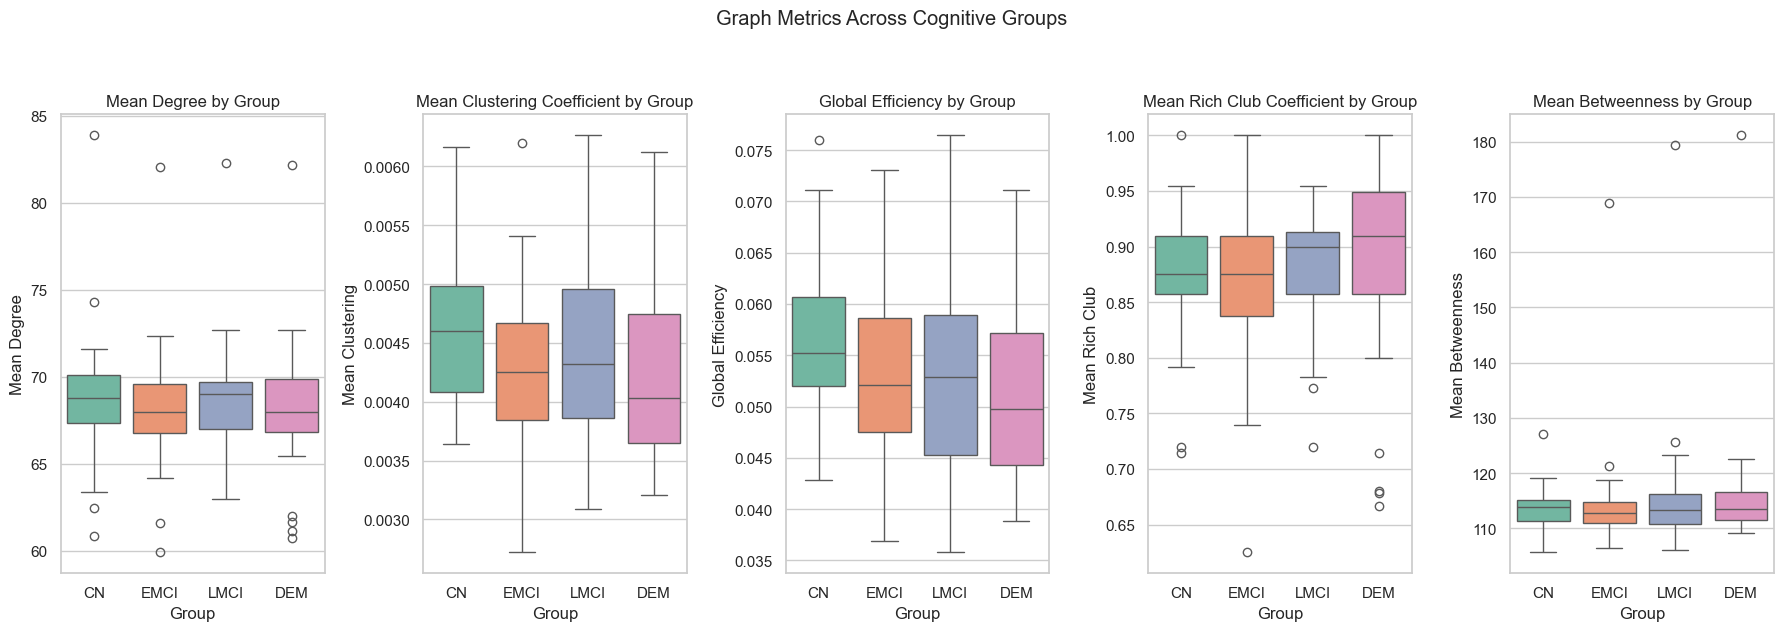


Kruskal-Wallis Statistical Test Results:
Mean_Degree: p-value = 0.5843
Mean_Clustering: p-value = 0.0408
Global_Efficiency: p-value = 0.0072
Mean_RC: p-value = 0.3741
Mean_Betweenness: p-value = 0.6895


In [6]:
# list of cognitive groups and the base folder for connectomes
groups = ['CN','EMCI', 'LMCI', 'DEM']
base_folder = 'data/connectomes/'

results = []

for group in groups:
    group_folder = os.path.join(base_folder, group)
    file_pattern = os.path.join(group_folder, '*.csv')
    connectome_files = glob.glob(file_pattern)
    
    for file in connectome_files:
        try:
            # matrix
            connectome = np.loadtxt(file, delimiter=',')
            
            # normalise connectome
            norm_conn = (connectome - np.min(connectome)) / (np.max(connectome) - np.min(connectome))
            
            # compute graph metrics using BCT functions:
            # 1. node degree
            degrees = bct.degrees_und(norm_conn)
            mean_degree = np.mean(degrees)
            
            # 2. clustering coeff
            clustering = bct.clustering_coef_wu(norm_conn)
            mean_clustering = np.mean(clustering)
            
            # 3. global eff
            global_eff = bct.efficiency_wei(norm_conn)

            # 4. rich club
            thresholded = bct.threshold_proportional(norm_conn, 0.10)
            # binarize
            bin_conn = bct.weight_conversion(thresholded, 'binarize')
            # the rich club coefficient
            rc = bct.rich_club_wu(bin_conn)
            rc = np.nan_to_num(rc, nan=0.0)
            mean_rc = np.mean(rc)

            #5. betweenness
            betweenness = bct.betweenness_wei(norm_conn)
            mean_betweenness = np.mean(betweenness)
            
            # append metrics
            results.append({
                'Group': group,
                'File': os.path.basename(file),
                'Mean_Degree': mean_degree,
                'Mean_Clustering': mean_clustering,
                'Global_Efficiency': global_eff,
                'Mean_RC': mean_rc,
                'Mean_Betweenness': mean_betweenness
            })
        except Exception as e:
            print(f"Error processing file {file}: {e}")

# convert to df
df_metrics = pd.DataFrame(results)
print("Summary of computed graph metrics:")
print(df_metrics.head())

# boxplots to compare the metrics across the four cognitive groups
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(df_metrics['Group'].unique()))
fig, axs = plt.subplots(1, 5, figsize=(18, 6))

# boxplot for mean degree
sns.boxplot(data=df_metrics, x='Group', y='Mean_Degree', ax=axs[0], palette=palette)
axs[0].set_title('Mean Degree by Group')
axs[0].set_xlabel('Group')
axs[0].set_ylabel('Mean Degree')

# boxplot for clustering coeff
sns.boxplot(data=df_metrics, x='Group', y='Mean_Clustering', ax=axs[1], palette=palette)
axs[1].set_title('Mean Clustering Coefficient by Group')
axs[1].set_xlabel('Group')
axs[1].set_ylabel('Mean Clustering')

# boxplot for global eff
sns.boxplot(data=df_metrics, x='Group', y='Global_Efficiency', ax=axs[2], palette=palette)
axs[2].set_title('Global Efficiency by Group')
axs[2].set_xlabel('Group')
axs[2].set_ylabel('Global Efficiency')

sns.boxplot(data=df_metrics, x='Group', y='Mean_RC', ax=axs[3], palette=palette)
axs[3].set_title('Mean Rich Club Coefficient by Group')
axs[3].set_xlabel('Group')
axs[3].set_ylabel('Mean Rich Club')

sns.boxplot(data=df_metrics, x='Group', y='Mean_Betweenness', ax=axs[4], palette=palette)
axs[4].set_title('Mean Betweenness by Group')
axs[4].set_xlabel('Group')
axs[4].set_ylabel('Mean Betweenness')

plt.suptitle('Graph Metrics Across Cognitive Groups', y=1.05)
plt.tight_layout()
plt.show()

# Perform statistical comparisons using the Kruskal–Wallis test for non-parametric data.
print("\nKruskal-Wallis Statistical Test Results:")
for metric in ['Mean_Degree', 'Mean_Clustering', 'Global_Efficiency', 'Mean_RC', 'Mean_Betweenness']:
    # Collect data for each group
    group_data = [df_metrics[df_metrics['Group'] == group][metric].values for group in groups]
    stat, p_value = kruskal(*group_data)
    print(f"{metric}: p-value = {p_value:.4f}")

In [7]:
df_metrics.head()

,Group,File,Mean_Degree,Mean_Clustering,Global_Efficiency,Mean_RC,Mean_Betweenness
0,CN,CN_41.csv,66.976190,0.005560,0.067465,0.869565,114.036675
1,CN,CN_40.csv,71.000000,0.003918,0.049921,0.954545,115.278777
2,CN,CN_18.csv,71.476190,0.005118,0.064448,0.909091,111.397414
3,CN,CN_24.csv,70.309524,0.004018,0.052792,0.720000,109.716127
4,CN,CN_30.csv,60.833333,0.004294,0.051336,0.714286,110.512815


In [8]:
import scikit_posthocs as sp

# dunn test
print("\nDunn's Test Pairwise Comparisons:")

for metric in ['Mean_Degree', 'Mean_Clustering', 'Global_Efficiency', 'Mean_RC', 'Mean_Betweenness']:
    print(f"\nDunn test for {metric}:")
    dunn_results = sp.posthoc_dunn(df_metrics, val_col=metric, group_col="Group")
    print(dunn_results)


Dunn's Test Pairwise Comparisons:

Dunn test for Mean_Degree:
            CN       DEM      EMCI      LMCI
CN    1.000000  0.332505  0.273656  0.915494
DEM   0.332505  1.000000  0.900047  0.388154
EMCI  0.273656  0.900047  1.000000  0.322873
LMCI  0.915494  0.388154  0.322873  1.000000

Dunn test for Mean_Clustering:
            CN       DEM      EMCI      LMCI
CN    1.000000  0.005996  0.042453  0.199855
DEM   0.005996  1.000000  0.472178  0.142640
EMCI  0.042453  0.472178  1.000000  0.455009
LMCI  0.199855  0.142640  0.455009  1.000000

Dunn test for Global_Efficiency:
            CN       DEM      EMCI      LMCI
CN    1.000000  0.000696  0.019803  0.050278
DEM   0.000696  1.000000  0.288651  0.151701
EMCI  0.019803  0.288651  1.000000  0.709549
LMCI  0.050278  0.151701  0.709549  1.000000

Dunn test for Mean_RC:
            CN       DEM      EMCI      LMCI
CN    1.000000  0.245659  0.580764  0.690484
DEM   0.245659  1.000000  0.086671  0.445606
EMCI  0.580764  0.086671  1.000000  0

/var/folders/88/27mws8mx02qdqd8pk9dp1pg00000gn/T/ipykernel_31939/1089259035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='Group', y=metric, ax=ax, palette=palette, order=order)
/var/folders/88/27mws8mx02qdqd8pk9dp1pg00000gn/T/ipykernel_31939/1089259035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='Group', y=metric, ax=ax, palette=palette, order=order)
/var/folders/88/27mws8mx02qdqd8pk9dp1pg00000gn/T/ipykernel_31939/1089259035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_me

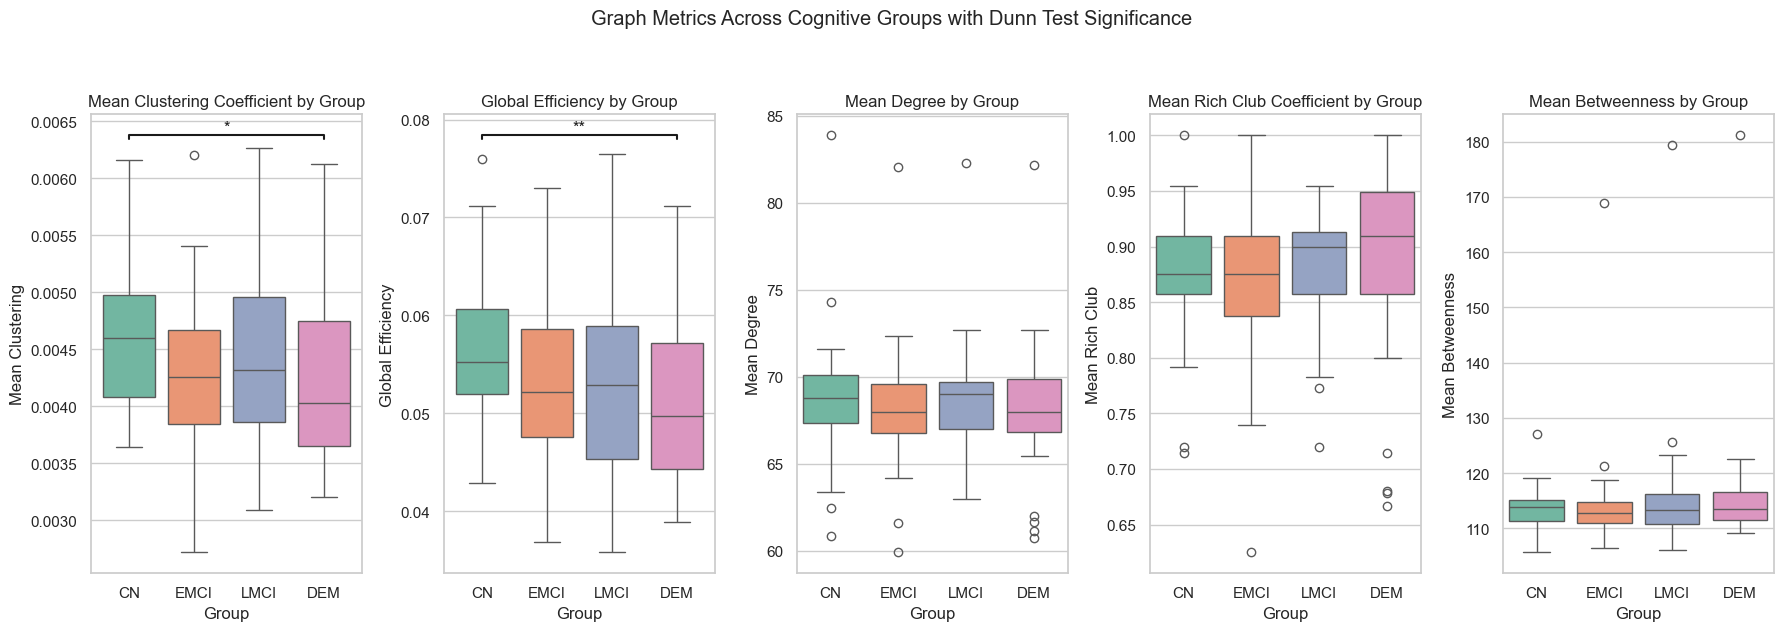

In [9]:
import itertools

order = groups 
palette = sns.color_palette("Set2", n_colors=len(order))
metrics = ['Mean_Clustering', 'Global_Efficiency', 'Mean_Degree', 'Mean_RC', 'Mean_Betweenness']
titles = ['Mean Clustering Coefficient by Group',
          'Global Efficiency by Group',
          'Mean Degree by Group',
          'Mean Rich Club Coefficient by Group',
          'Mean Betweenness by Group']
y_labels = ['Mean Clustering', 'Global Efficiency', 'Mean Degree', 'Mean Rich Club', 'Mean Betweenness']


fig, axs = plt.subplots(1, 5, figsize=(18, 6))

for ax, metric, title, ylabel in zip(axs, metrics, titles, y_labels):
    sns.boxplot(data=df_metrics, x='Group', y=metric, ax=ax, palette=palette, order=order)
    ax.set_title(title)
    ax.set_xlabel('Group')
    ax.set_ylabel(ylabel)

    dunn_results = sp.posthoc_dunn(df_metrics, val_col=metric, group_col="Group", p_adjust='bonferroni')
    
    # loop over all pairwise combinations
    for group1, group2 in itertools.combinations(order, 2):
        p_val = dunn_results.loc[group1, group2]
        if p_val < 0.05:
            # Determine y-position based on the maximum values for these two groups
            y1 = df_metrics[df_metrics['Group'] == group1][metric].max()
            y2 = df_metrics[df_metrics['Group'] == group2][metric].max()
            y_max_pair = max(y1, y2)
            
            # Use a fraction of the overall range to set the vertical offsets
            data_range = df_metrics[metric].max() - df_metrics[metric].min()
            y = y_max_pair + 0.05 * data_range  # starting position for line
            h = 0.01 * data_range                # height of the annotation line
            
            # X positions are based on the categorical positions (0, 1, 2, 3)
            x1 = order.index(group1)
            x2 = order.index(group2)
            ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
            
            # Determine significance stars based on p-value
            if p_val < 0.001:
                stars = '***'
            elif p_val < 0.01:
                stars = '**'
            else:
                stars = '*'
            ax.text((x1 + x2) / 2, y + h, stars, ha='center', va='bottom', color='k')

plt.suptitle('Graph Metrics Across Cognitive Groups with Dunn Test Significance', y=1.05)
plt.tight_layout()
plt.show()